# Demo 10 - Predictive Models: Classification

In this notebook we'll use the famous [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) to check out some real decision trees!  

<img src="https://github.com/nmattei/cmps3160/blob/master/_demos/data/iris.png?raw=1">

This data set has:
1. 150 instances with 4 attributes (same units, all numeric)
2. Balanced class distribution
3. No missing data

In [1]:
# first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
# Startup Magic to: (1) Mount Google Drive
# (2) Change to Course Folder
# (3) Pull latest Changes
# (4) Move to the Demo Directory so that the data files are available

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/cmps3160
# !git pull
%cd _demos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/cmps3160
/content/drive/My Drive/cmps3160/_demos


In [2]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load SQLITE
import sqlite3
# Load Stats
from scipy import stats

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
# Import the data and check it out...
df_iris = pd.read_csv("./data/iris.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df_iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Make a test and train split.  Note that we are using a *stratified sample* here so that we don't mess up our classifier! [More info in the docs!](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [6]:
# Vectorize the whole thing...
import sklearn
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_iris, 
                               test_size=0.4, 
                               stratify=df_iris["species"])

In [7]:
# Check that...
train.groupby("species").size()

species
setosa        30
versicolor    30
virginica     30
dtype: int64

In [8]:
test.groupby("species").size()

species
setosa        20
versicolor    20
virginica     20
dtype: int64

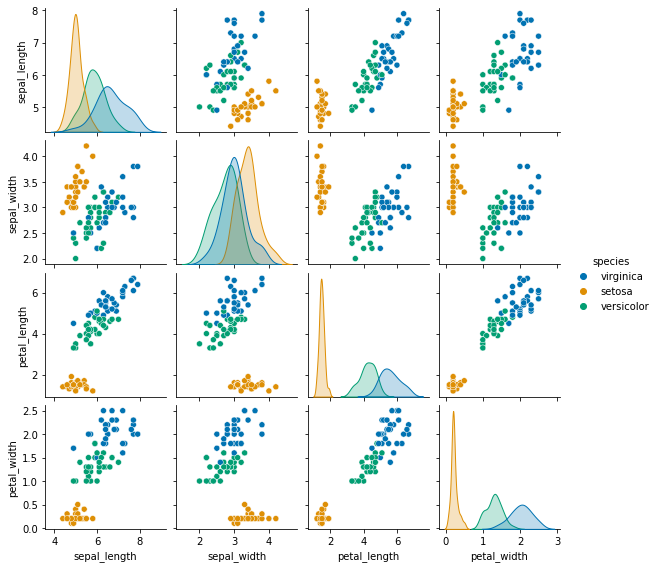

In [9]:
# Just for fun..
import seaborn as sns
sns.pairplot(train, hue="species", height=2, palette='colorblind')

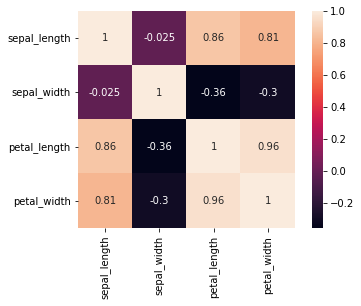

In [10]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

## Decision Tree

Now let's build a decision tree!

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
features = ['sepal_length','sepal_width','petal_length','petal_width']
X_train = train[features]
y_train = train.species
X_test = test[features]
y_test = test.species

In [12]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)

In [13]:
# Check some measures...
print(f"The accuracy of the Decision Tree is {metrics.accuracy_score(prediction,y_test):.3f}")
print(f"The Precision of the Decision Tree is {metrics.precision_score(prediction,y_test,average='weighted'):.3f}")
print(f"The Recall of the Decision Tree is {metrics.recall_score(prediction,y_test,average='weighted'):.3f}")

The accuracy of the Decision Tree is 0.917
The Precision of the Decision Tree is 0.917
The Recall of the Decision Tree is 0.917


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


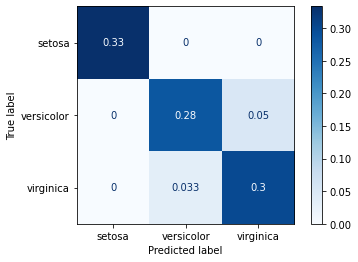

In [14]:
# Plot some graphs...
metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=mod_dt.classes_,
                                 cmap=plt.cm.Blues, normalize='all')

In [15]:
# Cooler...
mod_dt.feature_importances_


array([0.        , 0.        , 0.45449275, 0.54550725])

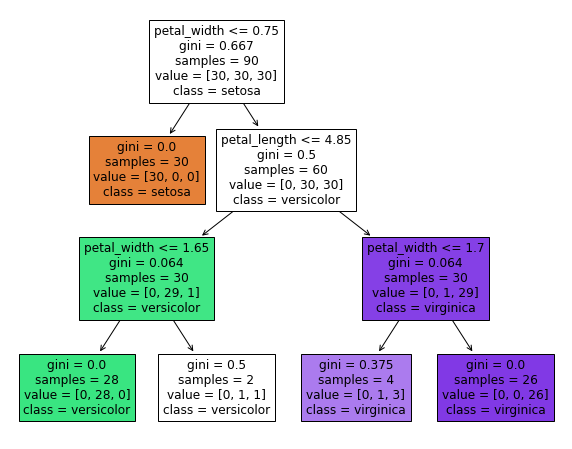

In [16]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = features, class_names = mod_dt.classes_, filled = True);

The Above only is using petal_width and petal_length... so we can plot the decision boundry..

<img src="https://github.com/nmattei/cmps3160/blob/master/_demos/data/boundry.png?raw=1">

## Logistic Regression

Let's compare with Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction=lr.predict(X_test)
print(f"The accuracy of Logistic Regression is {metrics.accuracy_score(lr_prediction,y_test):.3f}")
print(f"The Precision of Logistic Regression is {metrics.precision_score(lr_prediction,y_test,average='weighted'):.3f}")
print(f"The Recall of Logistic Regression is {metrics.recall_score(lr_prediction,y_test,average='weighted'):.3f}")

The accuracy of Logistic Regression is 0.983
The Precision of Logistic Regression is 0.984
The Recall of Logistic Regression is 0.983


### Logistic Regression coefficients

We can inspect the `_coef` variable of the LogisticRegression classifier to find the $\beta$ coefficients for each class. This is a matrix where cell (i,j) returns the $\beta$ parameter for class $i$ and feature $j$.

In [18]:
lr.coef_

array([[-0.38671967,  0.78735391, -2.21155117, -0.90644055],
       [ 0.28032953, -0.28210581, -0.07526758, -0.72372763],
       [ 0.10639014, -0.5052481 ,  2.28681875,  1.63016818]])

In [19]:
# let's put the coefficients into a nice data frame.
pd.DataFrame(lr.coef_, columns=features, index=lr.classes_)

,sepal_length,sepal_width,petal_length,petal_width
setosa,-0.38672,0.787354,-2.211551,-0.906441
versicolor,0.28033,-0.282106,-0.075268,-0.723728
virginica,0.10639,-0.505248,2.286819,1.630168


We can inspect the coefficients for each class for some insights into what the predictive features are. For example, `petal_length` appears to be strongly positively associated with the `virginica` class, which matches what we saw above in the pairplot. 



### Decision Boundary

To visualize the decision boundary, we'll fit a new Logistic Regression classifier using two dimensions.

We'll then make a countour plot showing the predictions as the two features change.

Note that in the latest version of sklearn, there is a [class](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay) that makes this plotting easier, but it is not available on Colab.

In [20]:
# fit a classifier using only two features
features_s = ['petal_length','petal_width']
X_train_s = train[features_s]
X_test_s = test[features_s]
lr.fit(X_train_s,y_train)
lr_prediction_s=lr.predict(X_test_s)

In [21]:
# generate a grid of points for many posible values of petal length and width.
xx, yy = np.mgrid[0:7:.01, 0:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
grid_preds = lr.predict(grid)
label2int = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
labelints = np.array([label2int[s] for s in grid_preds])
labelints = labelints.reshape(xx.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


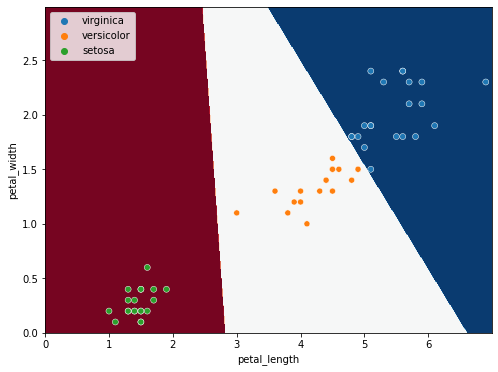

In [22]:
# plot the predicted class for each point.
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, labelints, 25, cmap="RdBu")
sns.scatterplot(data=X_test, ax=ax, x='petal_length', y='petal_width', hue=lr_prediction_s)
plt.legend(loc='upper left')

## Text classification

In this example we go through a light example of processing a dataset for analyzing text.

The data comes from [this website](https://www.cs.cornell.edu/people/pabo/movie-review-data/) at Cornell and is from Bo Pang and Lillian Lee, A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts, Proceedings of ACL 2004.

This contains 1000 positive and 1000 negative movie reviews. Our job is to classify a review as positive or negative based on the text.

In [23]:
# need to unzip the data first.
!unzip ./data/review_polarity.zip -d ./data/

Archive:  ./data/review_polarity.zip
replace ./data/__MACOSX/._review_polarity? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/review_polarity/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [24]:
!ls data/review_polarity/pos

cv000_29590.txt  cv250_25616.txt  cv500_10251.txt  cv750_10180.txt
cv001_18431.txt  cv251_22636.txt  cv501_11657.txt  cv751_15719.txt
cv002_15918.txt  cv252_23779.txt  cv502_10406.txt  cv752_24155.txt
cv003_11664.txt  cv253_10077.txt  cv503_10558.txt  cv753_10875.txt
cv004_11636.txt  cv254_6027.txt   cv504_29243.txt  cv754_7216.txt
cv005_29443.txt  cv255_13683.txt  cv505_12090.txt  cv755_23616.txt
cv006_15448.txt  cv256_14740.txt  cv506_15956.txt  cv756_22540.txt
cv007_4968.txt	 cv257_10975.txt  cv507_9220.txt   cv757_10189.txt
cv008_29435.txt  cv258_5792.txt   cv508_16006.txt  cv758_9671.txt
cv009_29592.txt  cv259_10934.txt  cv509_15888.txt  cv759_13522.txt
cv010_29198.txt  cv260_13959.txt  cv510_23360.txt  cv760_8597.txt
cv011_12166.txt  cv261_10954.txt  cv511_10132.txt  cv761_12620.txt
cv012_29576.txt  cv262_12649.txt  cv512_15965.txt  cv762_13927.txt
cv013_10159.txt  cv263_19259.txt  cv513_6923.txt   cv763_14729.txt
cv014_13924.txt  cv264_12801.txt  cv514_11187.txt  cv764_11739.txt

In [25]:
!cat data/review_polarity/pos/cv193_5416.txt

on the basis of this film alone , i never would have predicted that , in two years , quentin tarantino would become the country's biggest hotshot director . 
reservoir dogs has hints of the tarantino brilliance that emerged in pulp fiction , but is a much less substantive , more conventional crime story than the big pf . 
here's what the two movies do have in common . . . 
--scenes of intelligent , amusing dialogue with no relevance to the plot --a story that jumps back and forth in time rather than going in a logical , chronological sequence --graphic yet necessary violence --an engaging crime story --dialogue liberally spiced with swear words and racial/gender slurs --three of the same actors ( harvey keitel , tim roth and steve buscemi ) --a mexican standoff ending , although this one is considerably less optimistic than pf 
reservoir dogs is an entire hour shorter than pulp fiction because it's only got one story to tell rather than three . 
crime lord joe cabot ( veteran actor law

In [26]:
import glob

# labels are based on which directory the files are in.
all_pos = list(glob.glob("./data/review_polarity/pos/*"))
all_neg = list(glob.glob("./data/review_polarity/neg/*"))
labels = np.array([1] * len(all_pos) + [0] * len(all_neg))
filenames = all_pos + all_neg

We'll use TfidfVectorizer to convert each document into a (sparse) *feature* vector.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

vec = TfidfVectorizer(input='filename', stop_words='english')
X = vec.fit_transform(filenames)
X.shape

(2000, 39354)

So, we have 2000 documents and 39,659 unique words.

How big is this matrix?

Wait, how do we store that?

dense matrix:
$$
X=
  \begin{bmatrix}
    0.1 & 2.8 & 3.2 & ... & 1.5 \\
    3.2 & 4.1 & 5.1 & ... & 2.7  \\
    ...\\
    1.4 & 3.4 & 7.5 & ... & 7.5  \\
  \end{bmatrix}
$$

sparse matrix:
$$
X=
  \begin{bmatrix}
    0.1 & 0 & 0 & ... & 1.5 \\
    0 & 0 & 0 & ... & 2.7  \\
    ...\\
    0 & 3.4 & 0 & ... & 0  \\
  \end{bmatrix}
$$

How can we store a sparse matrix more efficiently?

<br><br><br>
[CSR matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)

In [28]:
X[0]

<1x39354 sparse matrix of type '<class 'numpy.float64'>'
	with 263 stored elements in Compressed Sparse Row format>

In [29]:
filenames[0]

'./data/review_polarity/pos/cv839_21467.txt'

In [30]:
!cat ./data/review_polarity/pos/cv839_21467.txt

assume nothing . 
the phrase is perhaps one of the most used of the 1990's , as first impressions and rumors are hardly ever what they seem to be . 
the phrase especially goes for oscar novak , an architect who is the main focus of three to tango , a delightful , funny romantic comedy about assumptions and being yourself . 
novak ( matthew perry ) , a shy , clumsy , chicago based architect , along with openly gay partner , peter steinberg ( oliver platt ) , fights for projects day in and day out . 
one of these is the job of restoring a popular building for charles newman ( dylan mcdermott ) , a rich , well-known businessman . 
charles immediately takes a liking to oscar , as he enjoys his personality and sense of humor . 
seeing oscar as someone he could trust , charles asks him to watch his girlfriend , an unpredictable , adventurous girl named amy post ( neve campbell ) , who makes a living by blowing glass . 
charles wants to know who she talks to , what she does , and where she go

In [31]:
X[0].indices

array([  215,  3713, 33191, 11543, 34046, 32255, 31236, 20421, 14400,
       17135, 22506, 24614, 18418, 27573,  6569,  6593,  7495, 19893,
        2651,  7953, 27357, 26198, 20329, 24218, 10368, 14351, 29824,
       38692, 37937,  8322, 11247,   212, 36564, 20664,  3775, 25182,
       32598, 33996, 32184, 19182,  5973, 32253,  5858, 21597, 29932,
       18860, 24524,  9147, 12746, 14055, 21787,  4811,  1492, 37306,
       25338, 29631, 38970,  7133,  1207, 24054,   213,  6639, 34236,
       26259, 35371, 20683,  4375, 26140, 19034,  9852, 13085, 11062,
       30674, 20857, 38405, 34785, 24525, 30227,  8645,  9793, 32913,
       38223, 21159, 26699, 33355,   963, 16698, 30413, 35540, 10802,
       31067, 26885,  7699,  9594, 13311, 19979, 36911, 20350, 37265,
       19496, 20780,  7342, 14449, 33244,  6965, 25599, 32179, 37859,
       34047, 15688, 37158, 30633, 33165, 22959, 16708, 24684, 38788,
        3878, 27758, 33925, 24142, 10574, 15684, 31500, 16338, 23797,
       30957,  6680,

In [32]:
feature_names = np.array(vec.get_feature_names_out())
feature_names[X[0].indices]

array(['1999', 'better', 'stars', 'ending', 'superb', 'snappy', 'sharp',
       'line', 'gem', 'identity', 'mistaken', 'outcome', 'irony', 'pure',
       'clever', 'climax', 'constantly', 'laughing', 'audience', 'couple',
       'prove', 'playful', 'light', 'offended', 'don', 'gays', 'route',
       'wise', 'vulgar', 'crude', 'element', '1997', 'uncut', 'longer',
       'bigger', 'park', 'south', 'summer', 'smiling', 'keeps',
       'characters', 'snappiness', 'certain', 'material', 'run', 'jokes',
       'original', 'delivering', 'fast', 'fun', 'mckenna', 'brosh',
       'aline', 'vaccaro', 'patrick', 'rodney', 'written', 'completed',
       'affection', 'object', '1998', 'close', 'suspiciously', 'plot',
       'times', 'look', 'boring', 'plain', 'just', 'disaster', 'film',
       'edgy', 'script', 'lucky', 'whatsoever', 'technique',
       'originality', 'santostefano', 'damon', 'direction', 'spot',
       'weak', 'major', 'practice', 'stick', 'acting', 'horrible',
       'scene', 't

In [33]:
X[0].data

array([0.03030992, 0.01536371, 0.02056505, 0.02149539, 0.03072866,
       0.04667269, 0.03257854, 0.02009914, 0.03697826, 0.03204523,
       0.03805403, 0.03904346, 0.03640059, 0.03099175, 0.02636374,
       0.0287055 , 0.02761026, 0.0296111 , 0.01587958, 0.02106223,
       0.02953737, 0.04274086, 0.04955506, 0.04018568, 0.01394804,
       0.05346218, 0.03878344, 0.02983679, 0.04596646, 0.0398832 ,
       0.02838468, 0.0296111 , 0.04667269, 0.02838468, 0.03280309,
       0.02991358, 0.03315323, 0.02400842, 0.04366829, 0.02690918,
       0.01280582, 0.05859823, 0.02529702, 0.02422014, 0.02236194,
       0.02517387, 0.01894227, 0.03621762, 0.02550695, 0.01882037,
       0.05346218, 0.05859823, 0.05859823, 0.05559383, 0.03339619,
       0.04832613, 0.0203709 , 0.04153664, 0.03658819, 0.03678066,
       0.02904084, 0.02315503, 0.04745338, 0.02677612, 0.01836811,
       0.01619999, 0.02383649, 0.03174275, 0.01044755, 0.03047458,
       0.01677195, 0.04083041, 0.05101898, 0.03268997, 0.03552

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [35]:
textlr = LogisticRegression()
textlr.fit(X_train, y_train)
y_predicted = textlr.predict(X_test)
print(f"accuracy= {metrics.accuracy_score(y_predicted,y_test):.3f}")
print(f"precision= {metrics.precision_score(y_predicted,y_test):.3f}")
print(f"recall ={metrics.recall_score(y_predicted,y_test):.3f}")

accuracy= 0.811
precision= 0.829
recall =0.803


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


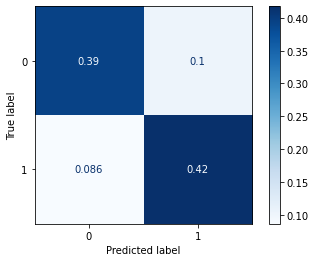

In [36]:
metrics.plot_confusion_matrix(textlr, X_test, y_test,
                                 display_labels=textlr.classes_,
                                 cmap=plt.cm.Blues, normalize='all')

In [37]:
pos_coef = pd.DataFrame(textlr.coef_[0],  index=feature_names).rename(columns={0: 'coef'})
pos_coef.sort_values('coef', ascending=False).head(20)

,coef
great,1.234703
truman,1.167373
life,0.999059
war,0.944817
performance,0.865198
jackie,0.788420
excellent,0.779120
titanic,0.773535
best,0.762075
family,0.746461


In [38]:
pos_coef.sort_values('coef', ascending=True).head(20)

,coef
bad,-2.452292
movie,-1.247675
plot,-1.208255
boring,-1.101725
worst,-1.035364
supposed,-0.965584
stupid,-0.909417
reason,-0.867921
unfortunately,-0.833222
waste,-0.811281


## Titanic

Let's fit a Decision Tree classifier on the Titanic data as well.

In [39]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic = pd.get_dummies(df_titanic, columns=['sex'])
# Be cheeky with our NAN
df_titanic = df_titanic[(df_titanic["age"].notna()) & (df_titanic["fare"].notna())]
df_titanic.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


In [40]:
train, test = train_test_split(df_titanic, 
                               test_size=0.4, 
                               stratify=df_titanic["survived"])

In [41]:
features = ["pclass", "fare", "sex_female", "age"]
X_train = train[features]
y_train = train.survived
X_test = test[features]
y_test = test.survived

In [42]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
# Check some measures...
print(f"The accuracy of the Decision Tree is {metrics.accuracy_score(prediction,y_test):.3f}")
print(f"The Precision of the Decision Tree is {metrics.precision_score(prediction,y_test,average='weighted'):.3f}")
print(f"The Recall of the Decision Tree is {metrics.recall_score(prediction,y_test,average='weighted'):.3f}")

The accuracy of the Decision Tree is 0.789
The Precision of the Decision Tree is 0.880
The Recall of the Decision Tree is 0.789


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


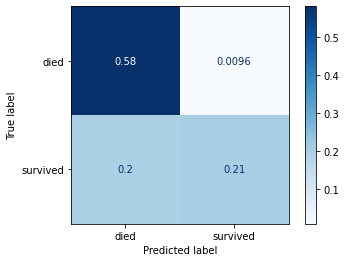

In [43]:
# Plot some graphs...
metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=["died","survived"],
                                 cmap=plt.cm.Blues, normalize='all')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


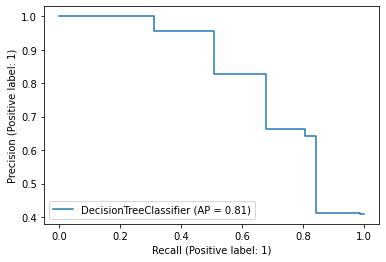

In [44]:
# Plot some graphs...
metrics.plot_precision_recall_curve(mod_dt, X_test, y_test)

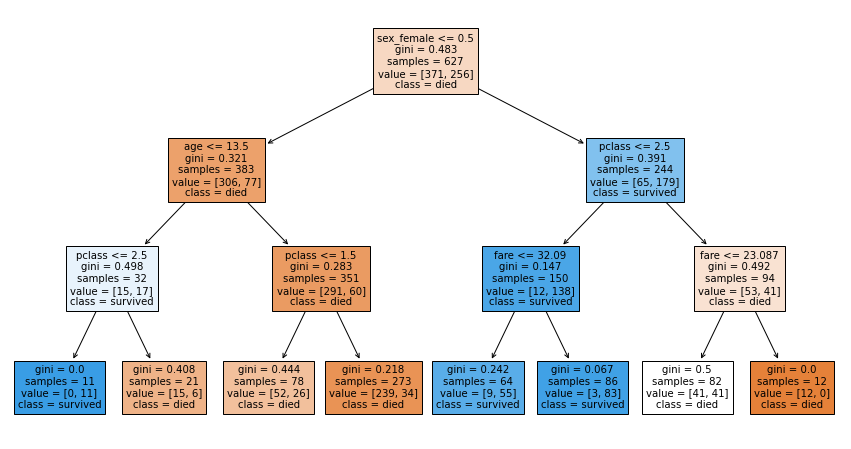

In [45]:
plt.figure(figsize = (15,8))
plot_tree(mod_dt, feature_names = features, class_names={1:"survived", 0:"died"}, filled = True);